In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OrdinalEncoder
from sklearn.preprocessing import PowerTransformer

In [2]:
data=pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\dt1516\train_csv.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [5]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [6]:
for i in data.columns:
    print(i, ":" ,data[i].nunique())

ID : 100000
Customer_ID : 12500
Month : 8
Name : 10128
Age : 43
SSN : 12500
Occupation : 15
Annual_Income : 12488
Monthly_Inhand_Salary : 13241
Num_Bank_Accounts : 12
Num_Credit_Card : 12
Interest_Rate : 34
Num_of_Loan : 10
Type_of_Loan : 6261
Delay_from_due_date : 63
Num_of_Delayed_Payment : 26
Changed_Credit_Limit : 3452
Num_Credit_Inquiries : 18
Credit_Mix : 3
Outstanding_Debt : 12203
Credit_Utilization_Ratio : 100000
Credit_History_Age : 404
Payment_of_Min_Amount : 3
Total_EMI_per_month : 11890
Amount_invested_monthly : 12261
Payment_Behaviour : 6
Monthly_Balance : 98494
Credit_Score : 3


columns ID, CUstomer Id, name, SSN has more unique values. so i drop those columns and those columns are representation of a single person

In [7]:
df=data.drop(columns=["ID", "Customer_ID" ,"Name","SSN"])
df.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,8.0,8.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Interest_Rate,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,...,29.0,29.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Num_of_Loan,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,...,5.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Type_of_Loan,"Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...","Auto Loan, Credit-Builder Loan, Personal Loan,...",Credit-Builder Loan,Credit-Builder Loan,...,"Personal Loan, Auto Loan, Mortgage Loan, Stude...","Personal Loan, Auto Loan, Mortgage Loan, Stude...","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan","Auto Loan, and Student Loan"


In [8]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

By using Label encoder and ordinal encoder, convert categorical column to numerical column

In [104]:
df["Credit_Score"]= LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Mix"]= LabelEncoder().fit_transform(df["Credit_Mix"])
df["Occupation"]= OrdinalEncoder().fit_transform(df[["Occupation"]])
df["Payment_Behaviour"]=OrdinalEncoder().fit_transform(df[["Payment_Behaviour"]])
df["Type_of_Loan"]=OrdinalEncoder().fit_transform(df[["Type_of_Loan"]])
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No': 2, 'NM': 1, 'Yes': 0})

In [130]:
df["Credit_Score"].unique()

array([0, 2, 1])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  float64
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

Exploitary Data Analysis

In [106]:
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [107]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [108]:
skewed_columns=['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']

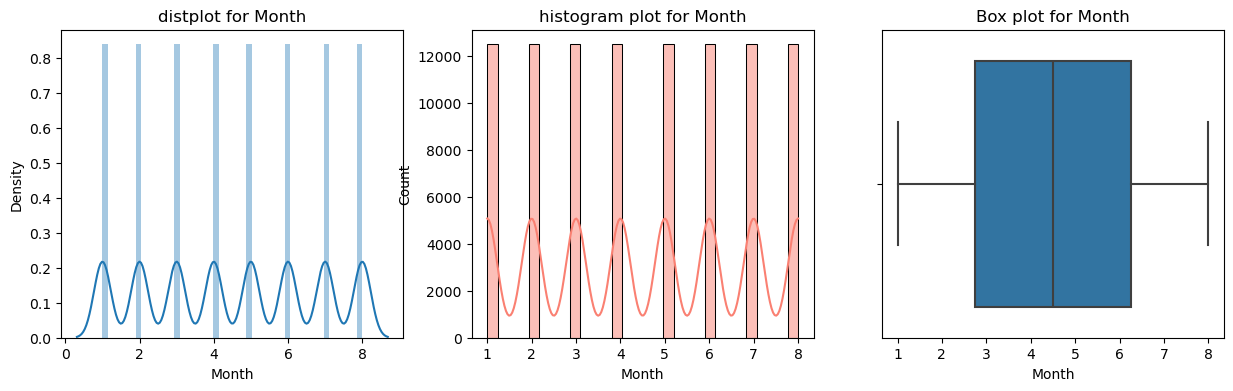

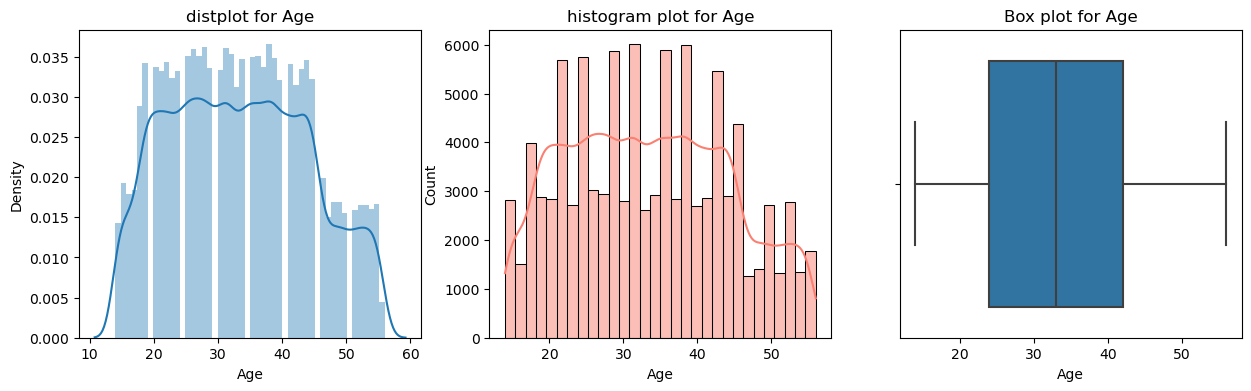

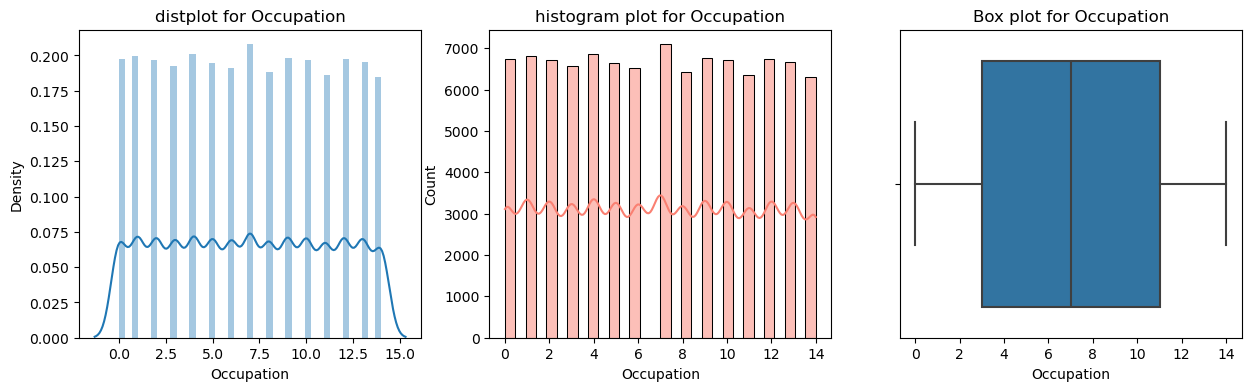

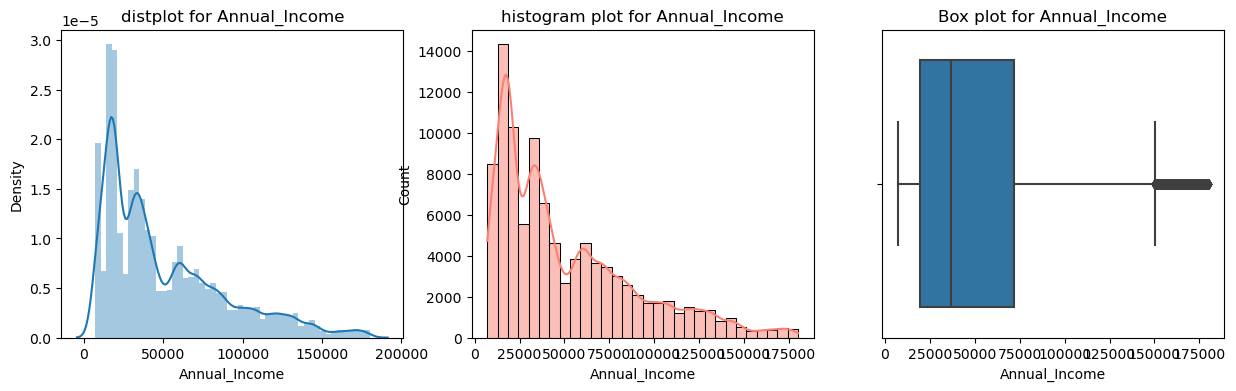

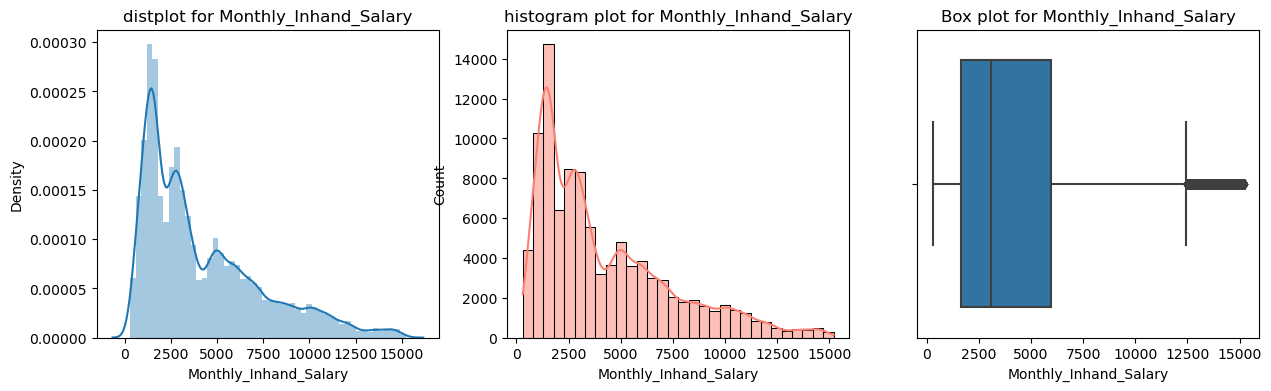

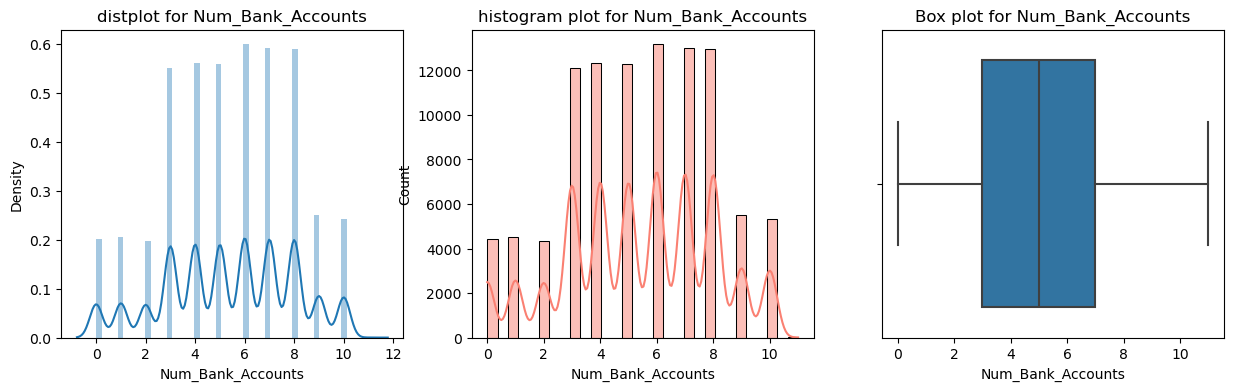

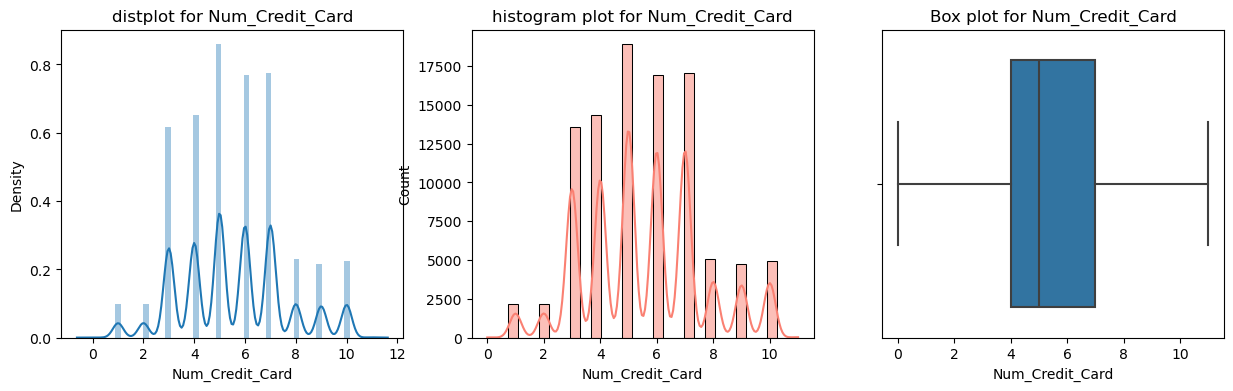

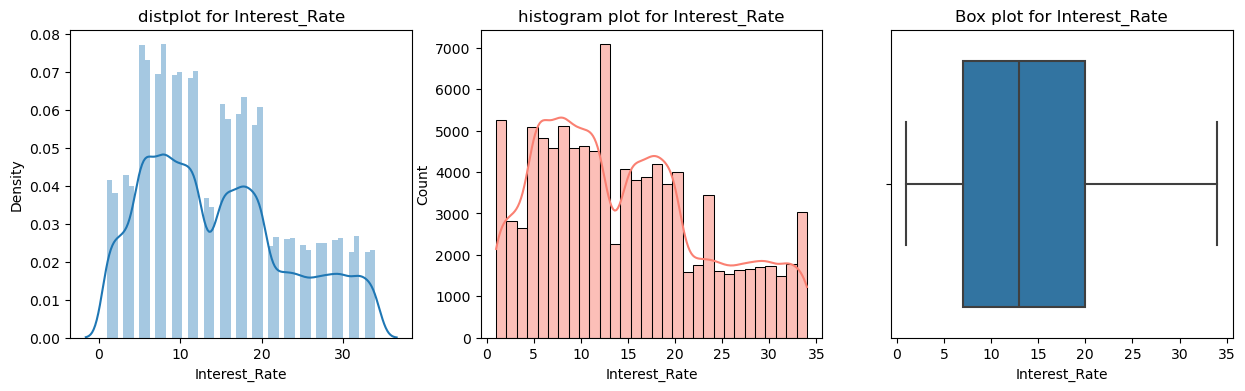

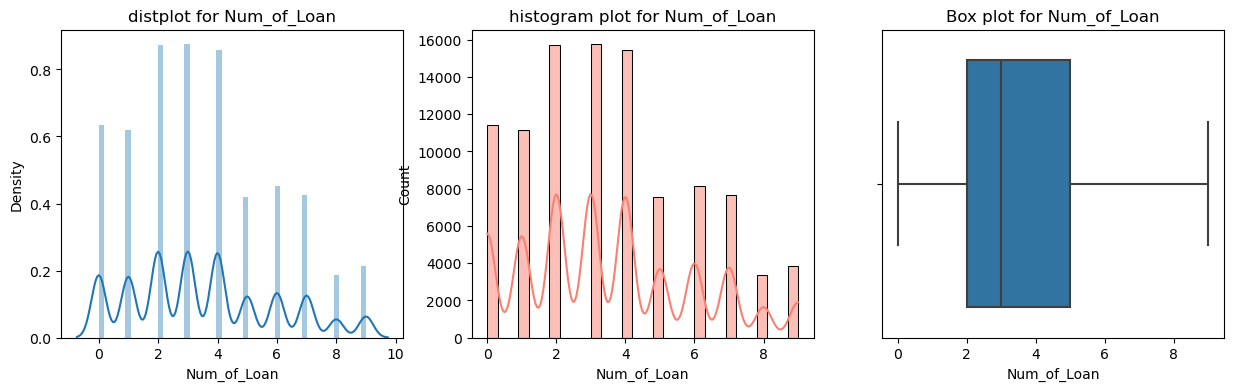

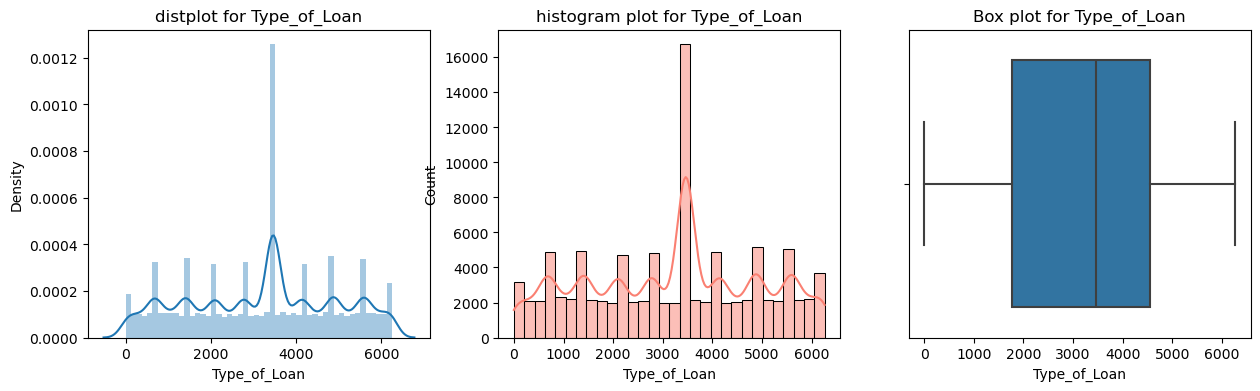

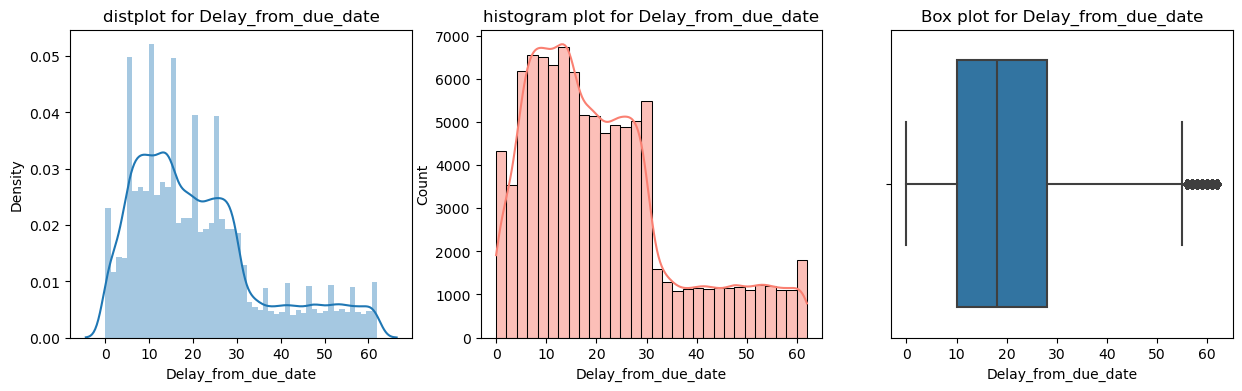

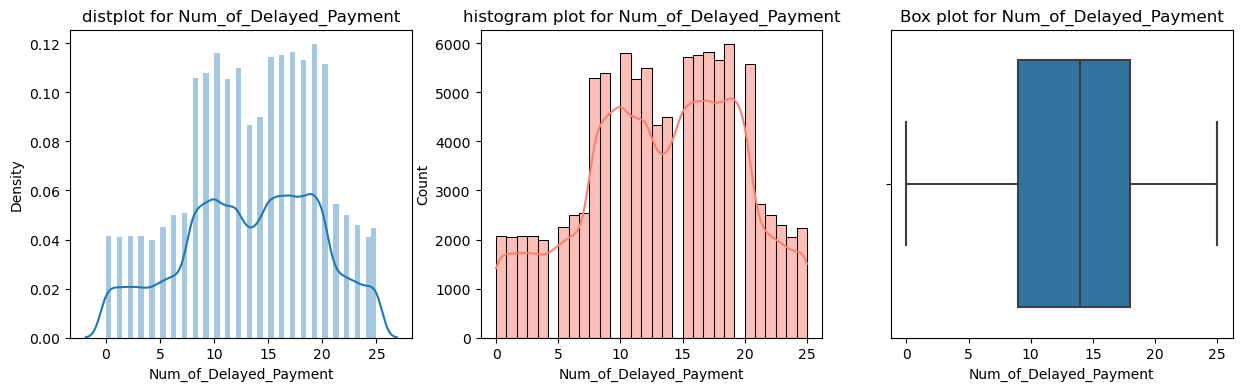

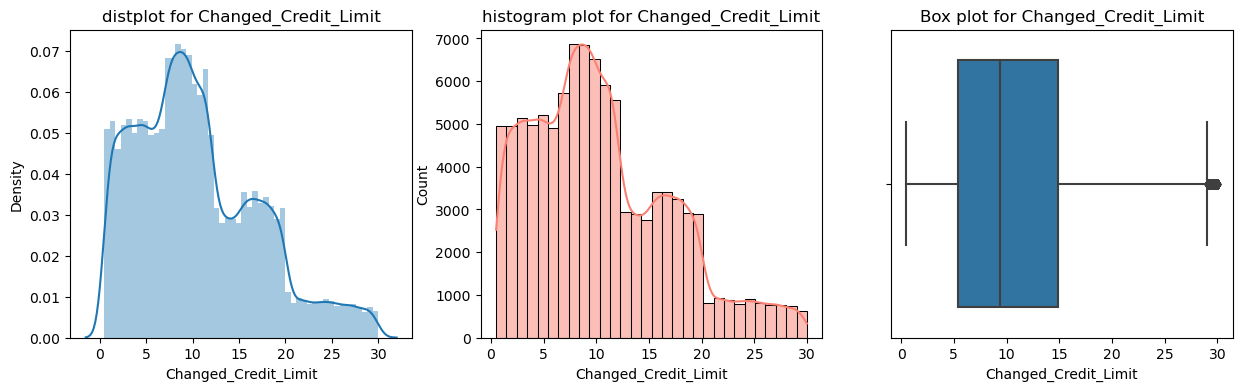

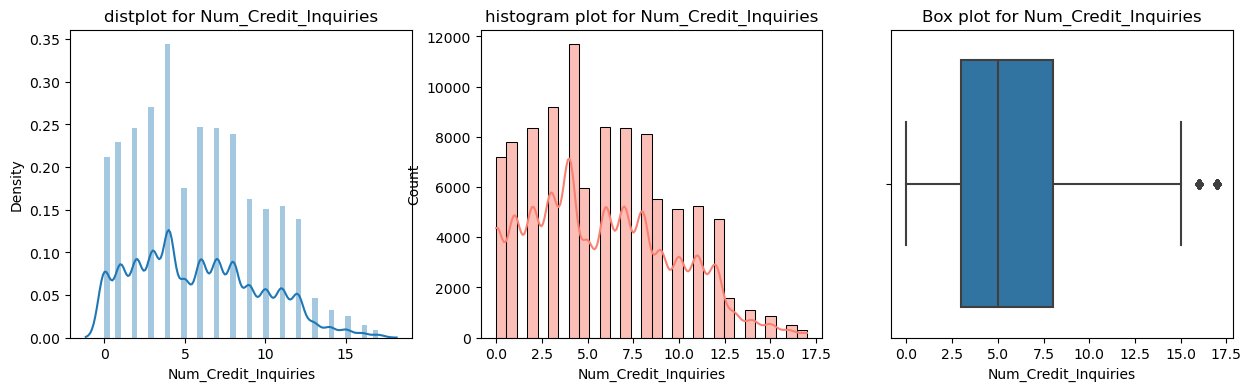

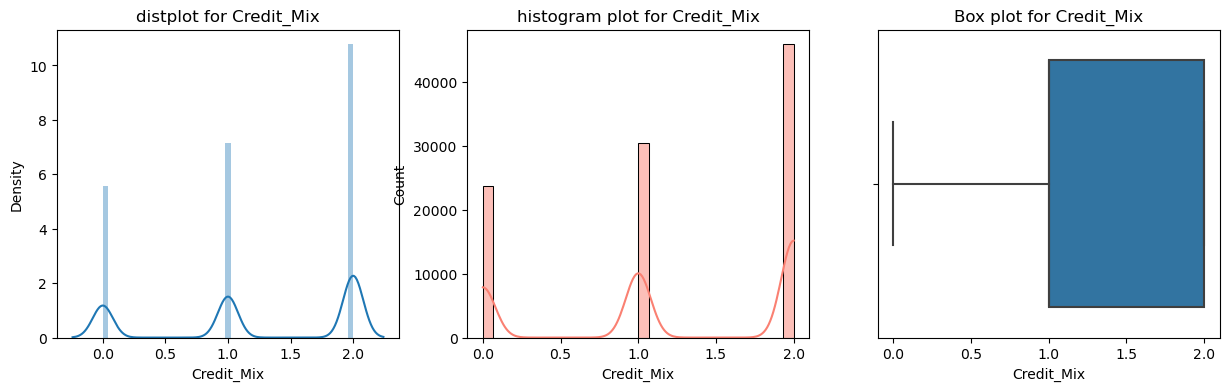

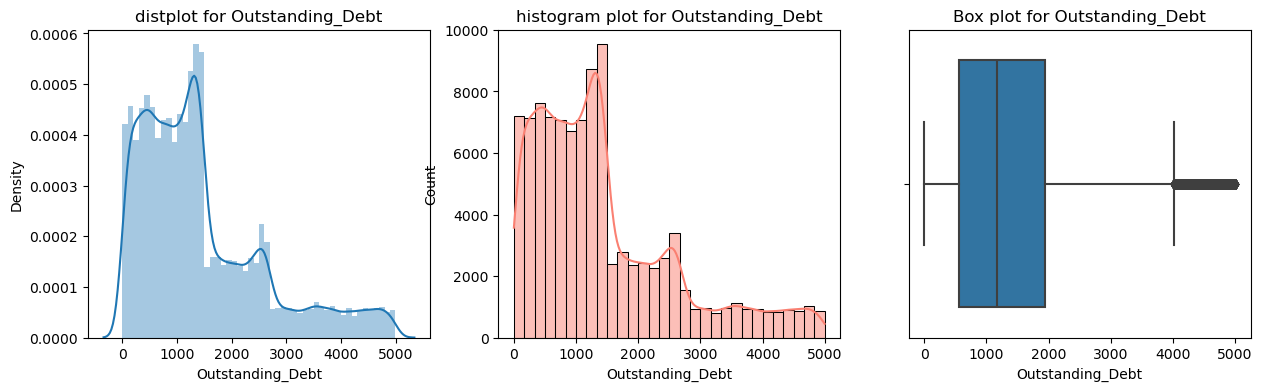

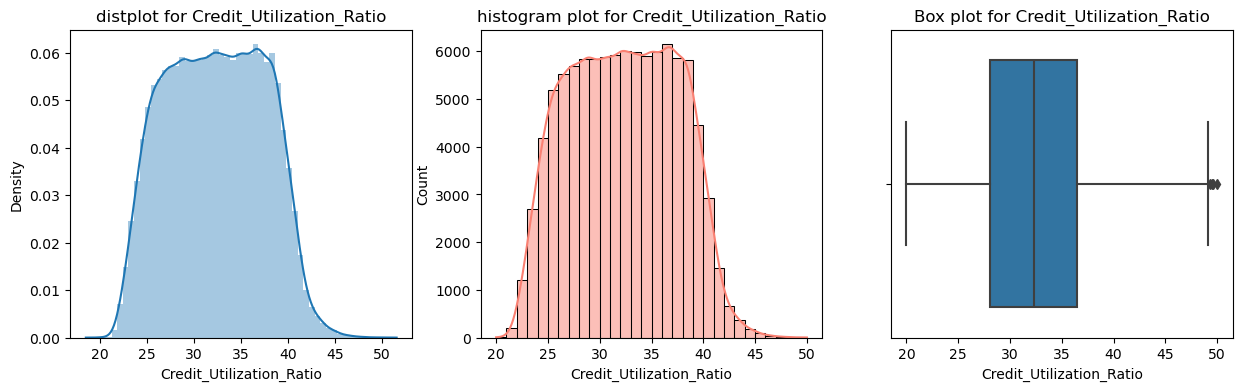

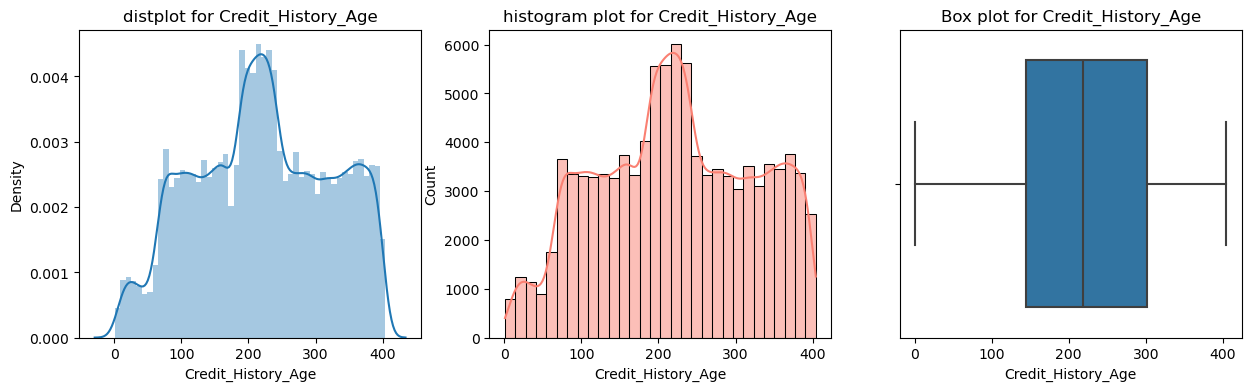

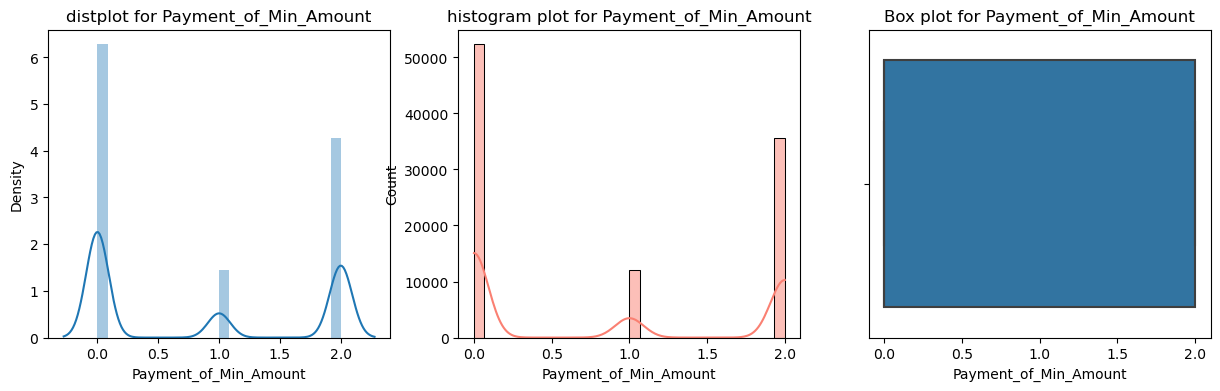

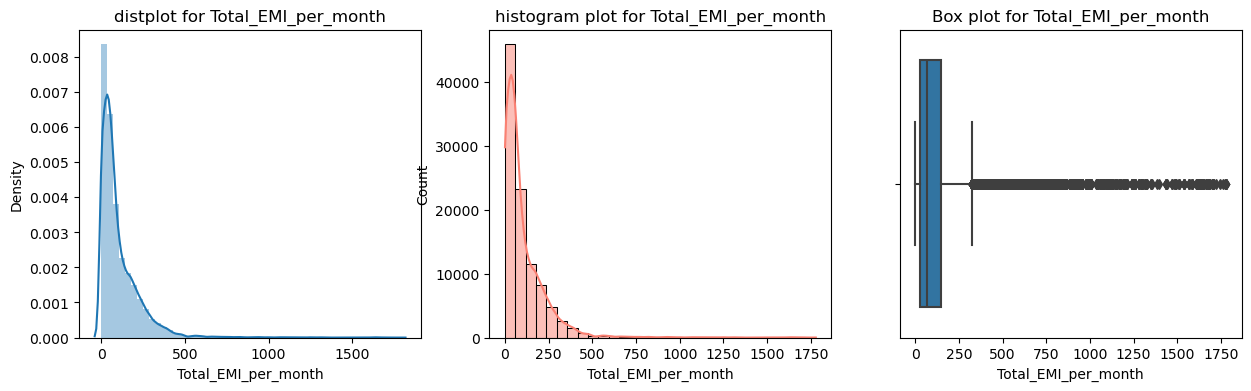

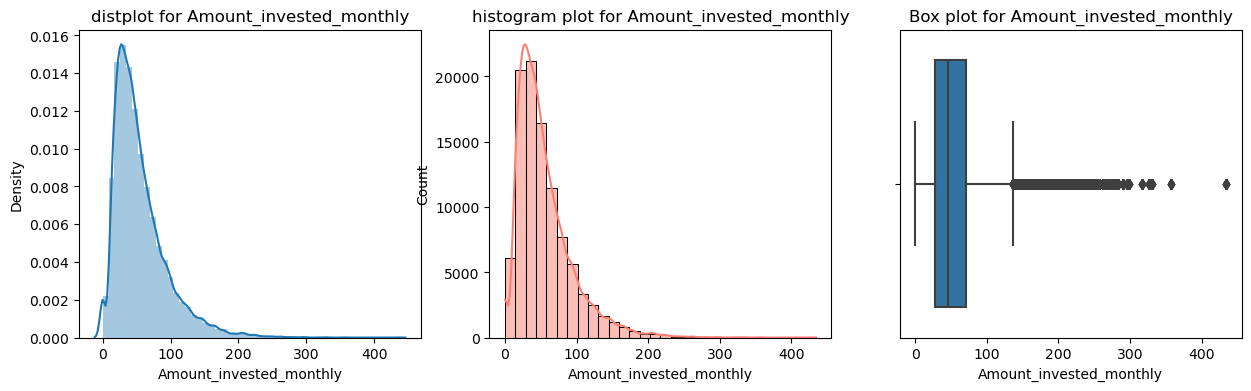

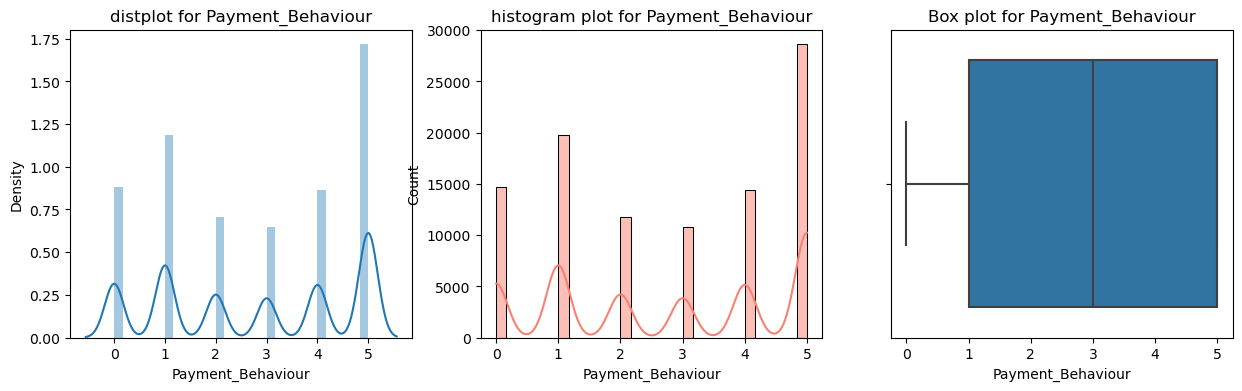

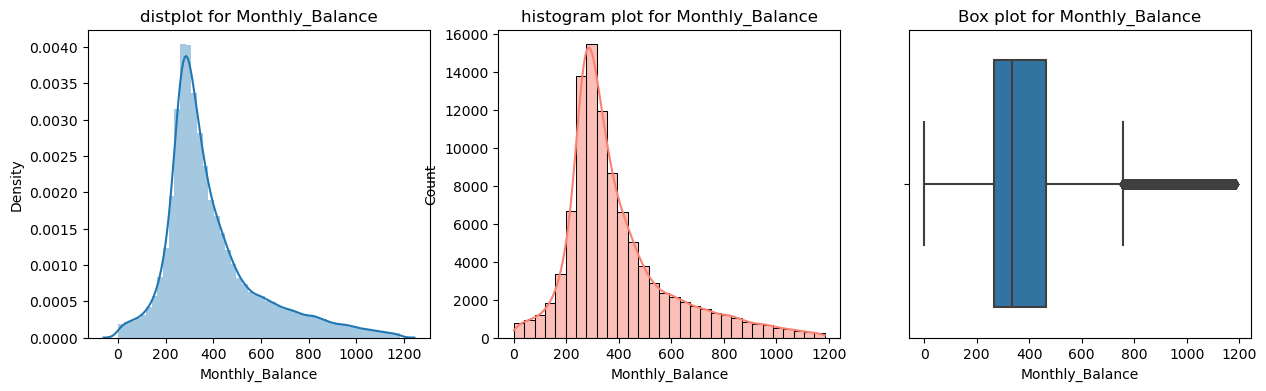

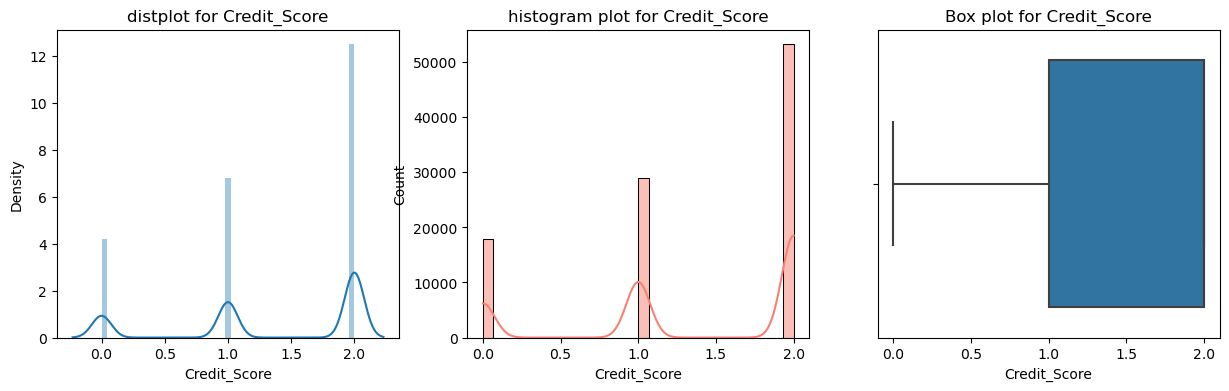

In [109]:
for i in skewed_columns:
  plot(df,i)

In [110]:
df1=df.copy()

In [111]:
df1["Annual_Income_log"]= np.log(df1["Annual_Income"])
df1["Monthly_Inhand_Salary_log"]= np.log(df1["Monthly_Inhand_Salary"])
df1["Interest_Rate_log"]= np.log(df1["Interest_Rate"])
df1["Changed_Credit_Limit_log"]= np.log(df1["Changed_Credit_Limit"])
df1["Outstanding_Debt_log"]= np.log(df1["Outstanding_Debt"])

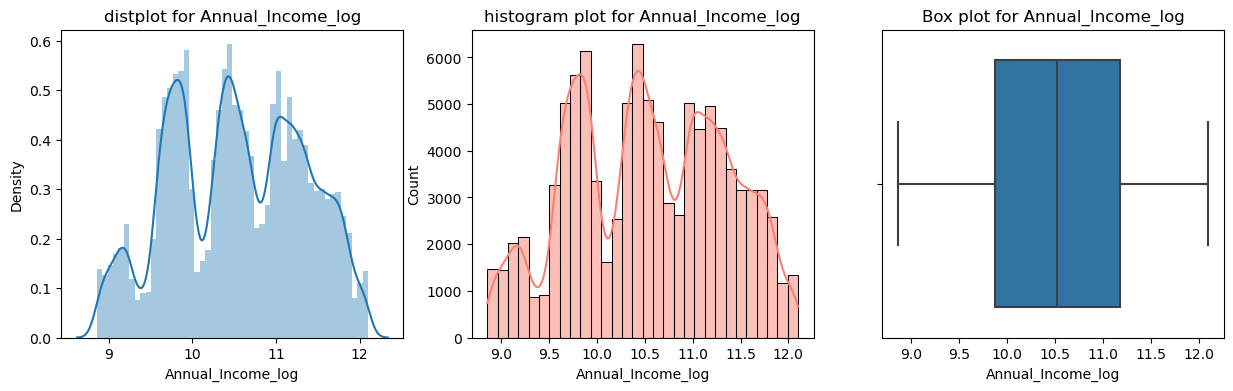

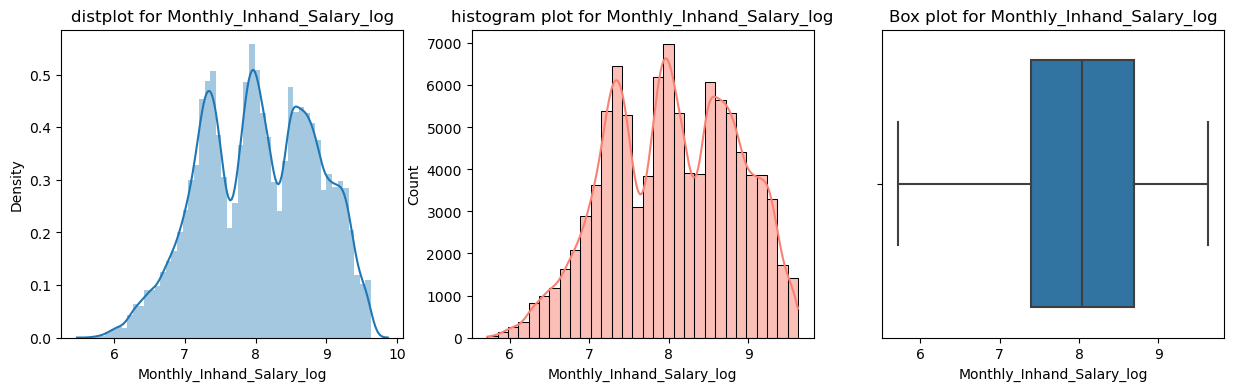

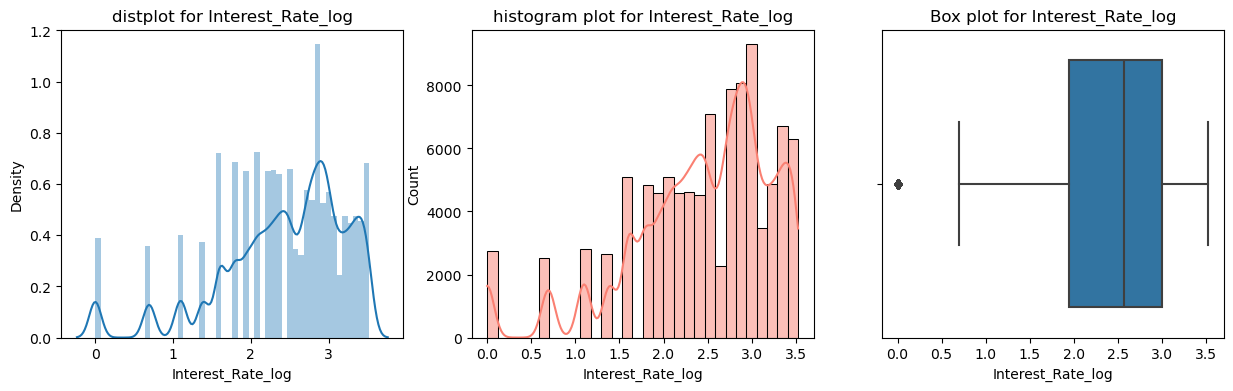

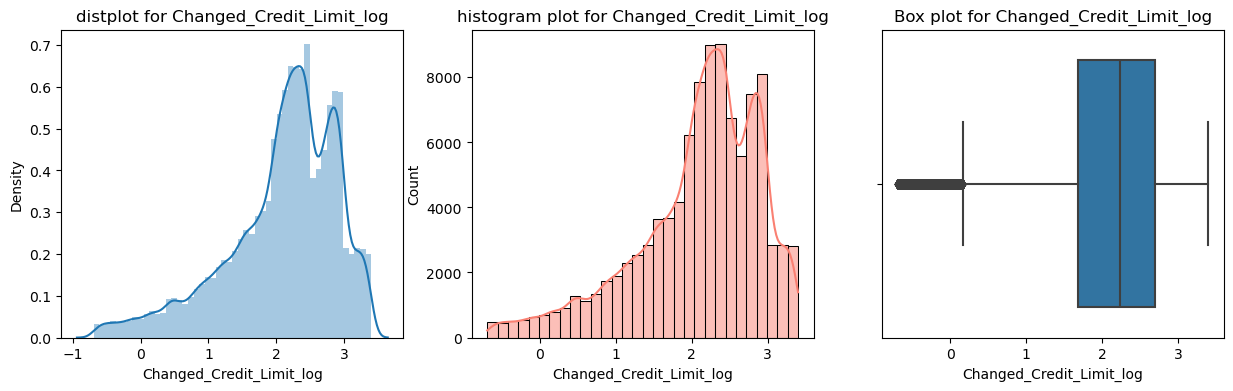

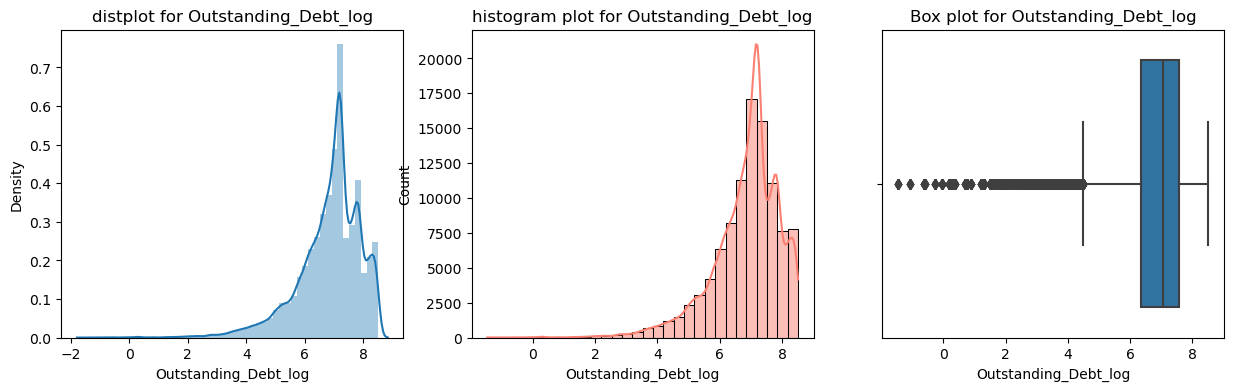

In [112]:
skwed_columns_2=["Annual_Income_log","Monthly_Inhand_Salary_log","Interest_Rate_log","Changed_Credit_Limit_log", "Outstanding_Debt_log"]
for i in skwed_columns_2:
  plot(df1,i)

outlier handling

In [113]:
df2= df1.copy()

In [114]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [115]:
outlier_columns= ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
                 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
for i in outlier_columns:
  outlier(df2,i)

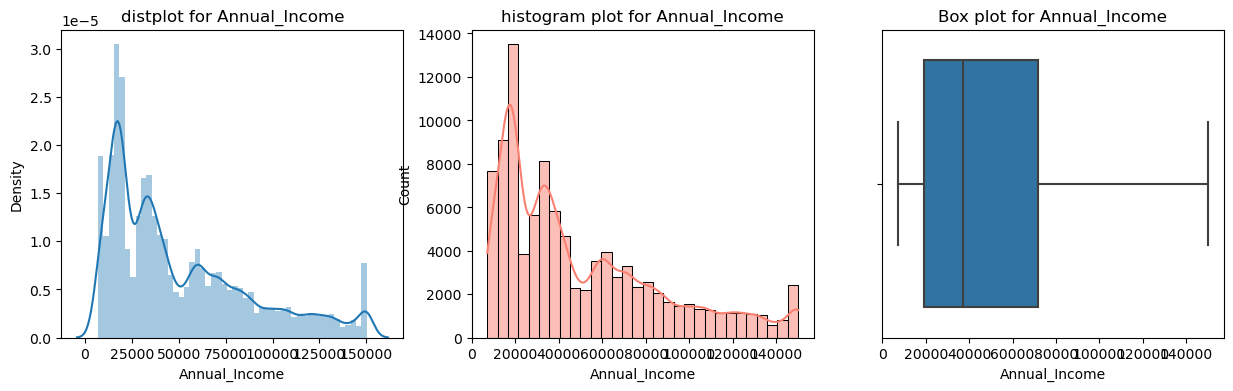

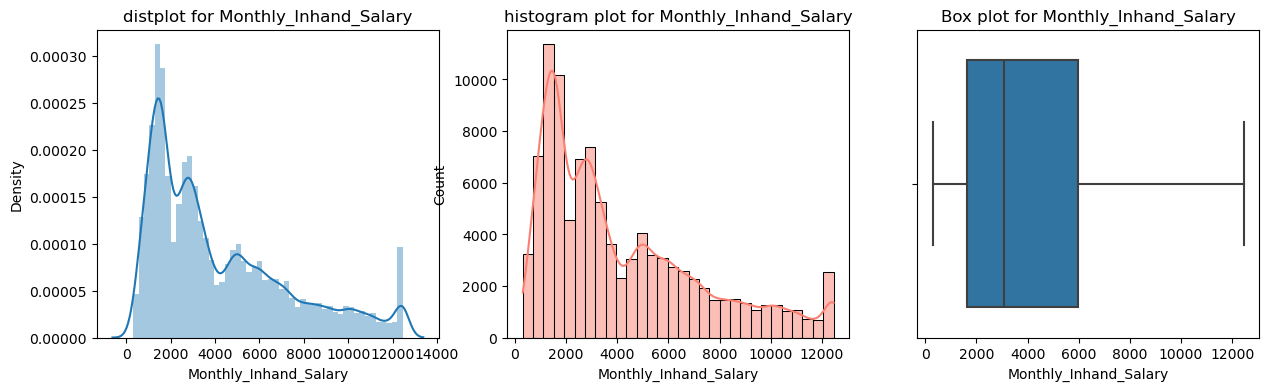

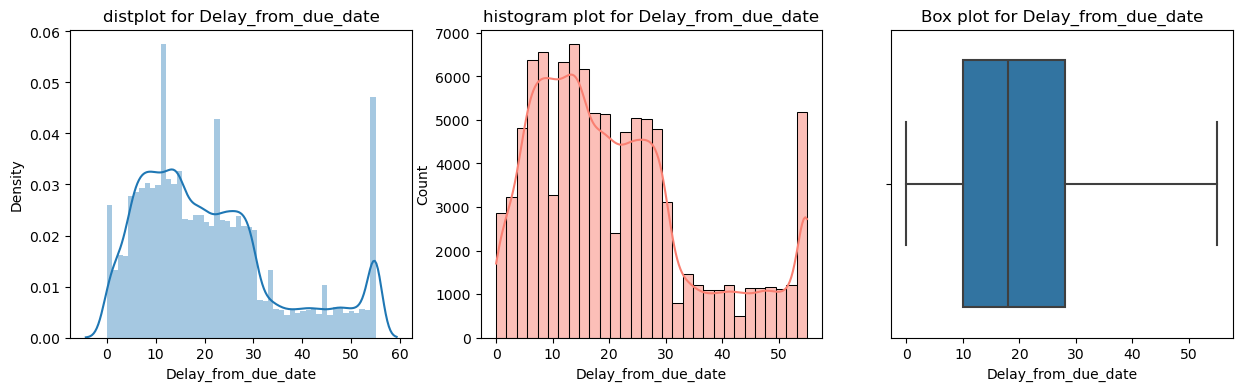

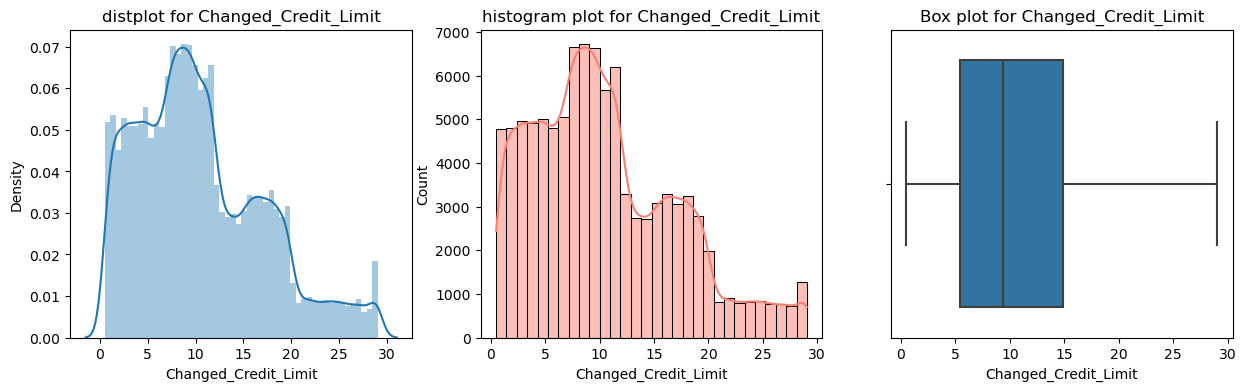

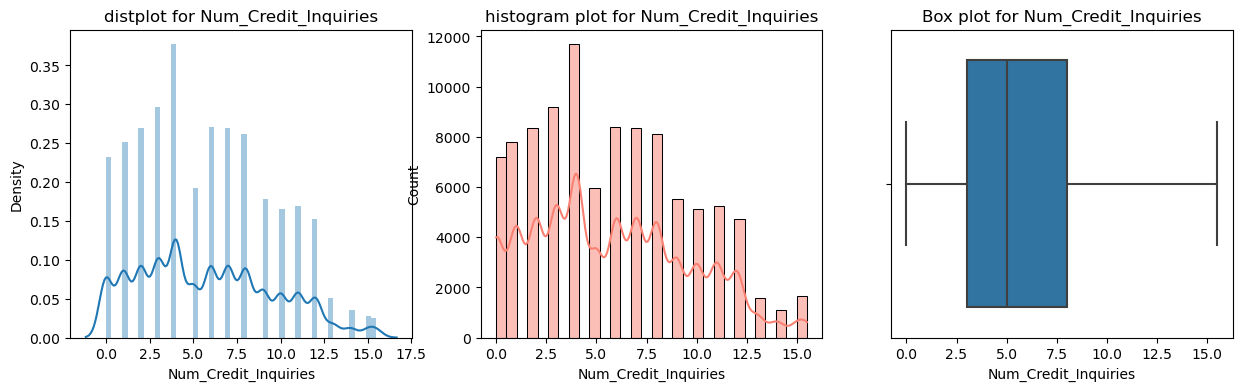

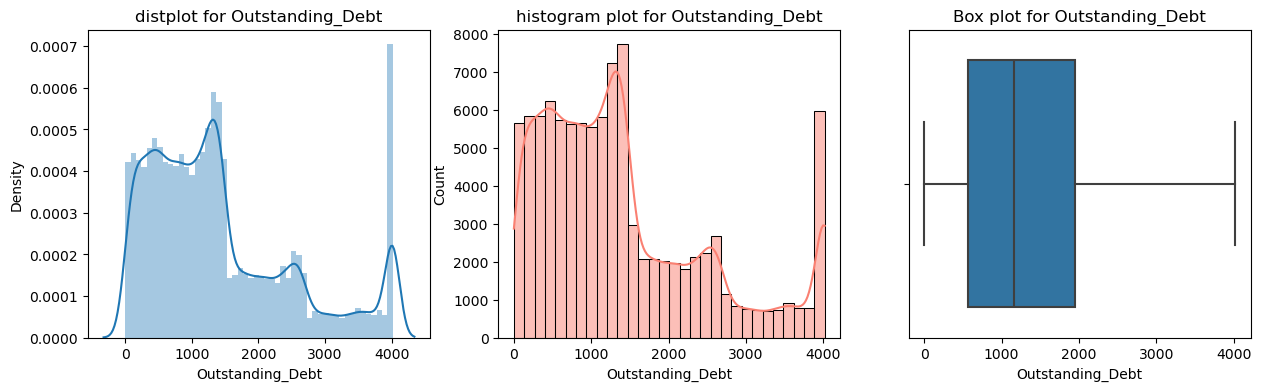

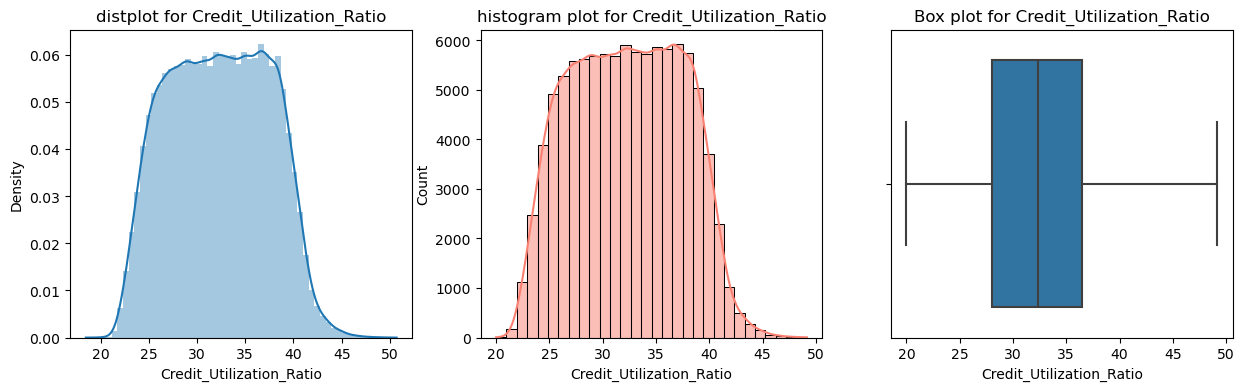

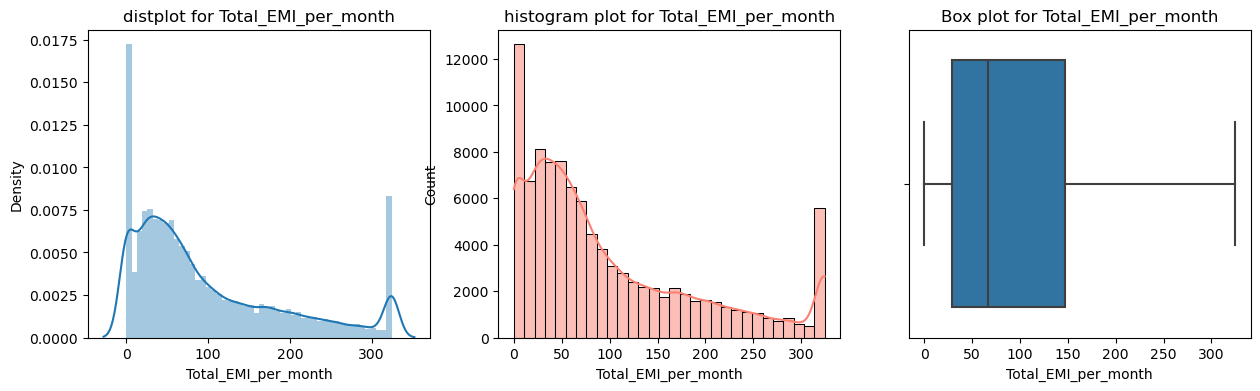

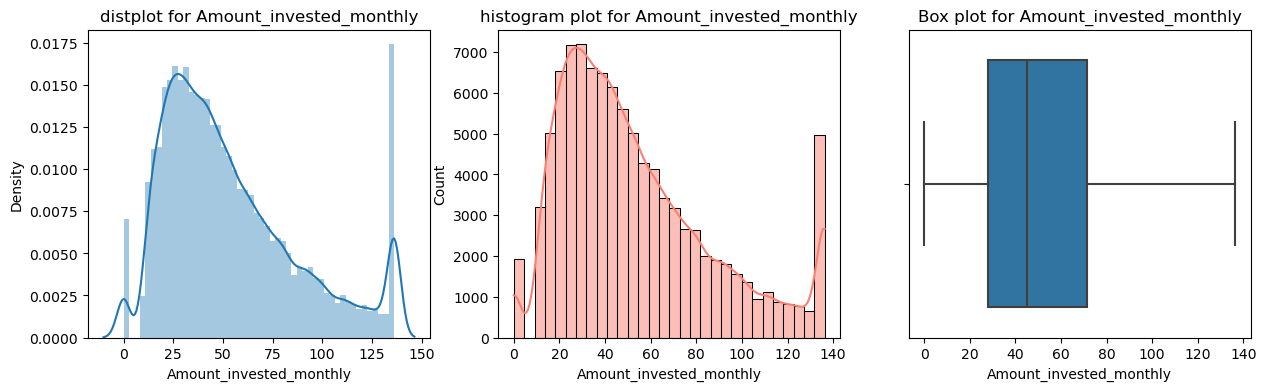

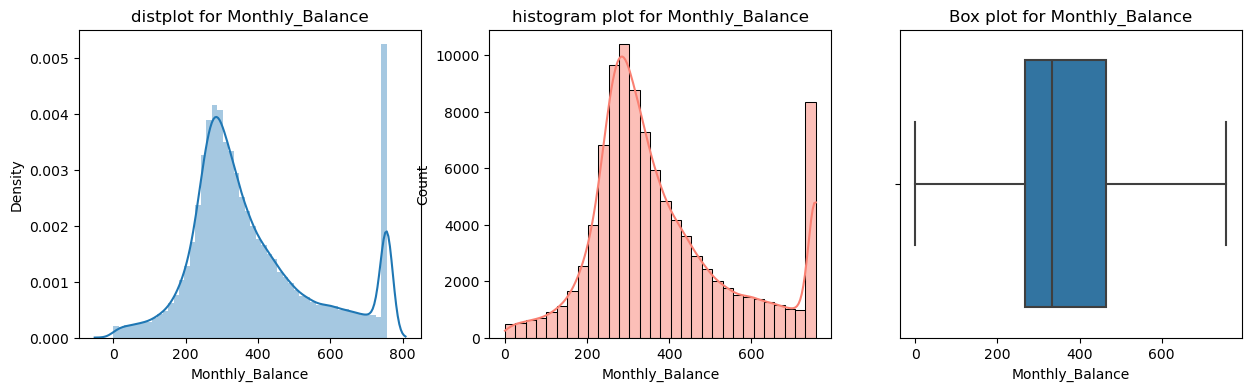

In [116]:
for i in outlier_columns:
  plot(df2,i)

In [118]:
df3= df2.drop(columns=["Annual_Income","Monthly_Inhand_Salary","Interest_Rate","Changed_Credit_Limit", "Outstanding_Debt"])

In [119]:
df3.columns

Index(['Month', 'Age', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Annual_Income_log', 'Monthly_Inhand_Salary_log',
       'Interest_Rate_log', 'Changed_Credit_Limit_log',
       'Outstanding_Debt_log'],
      dtype='object')

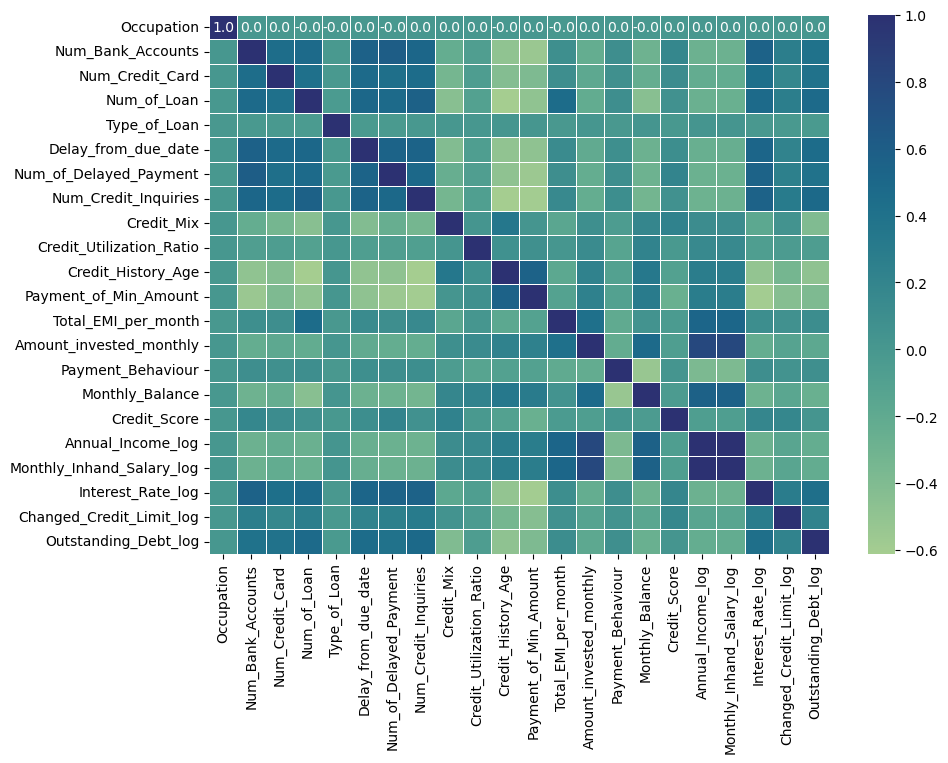

In [120]:
corr= df3.drop(columns=["Age","Month"]).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, linewidth=.5, cmap="crest", fmt=".1f")
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
# find the best algorithm for the classification prediction
def accuracy_prediction(x_data, y_data, algorithm):
    x= df3.drop(columns=["Credit_Score"])
    y= df3["Credit_Score"]
    
    #teain test splitting
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
    
    model= algorithm().fit(x_train,y_train)
    
    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)
    
    #checking the accuracy_score
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_test= accuracy_score(y_test, y_pred_test)
    
    metrics={"Algorithm": algorithm.__name__,
       "Accuracy_Train": accuracy_train,
       "Accuracy_Test": accuracy_test}
    return metrics

In [123]:
print(accuracy_prediction(x,y,DecisionTreeClassifier))
print(accuracy_prediction(x,y,RandomForestClassifier))
print(accuracy_prediction(x,y,ExtraTreesClassifier))
print(accuracy_prediction(x,y,AdaBoostClassifier))
print(accuracy_prediction(x,y,GradientBoostingClassifier))
print(accuracy_prediction(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.7431}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.8346}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.8287}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.65165, 'Accuracy_Test': 0.65345}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.72015, 'Accuracy_Test': 0.71475}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.8451375, 'Accuracy_Test': 0.78955}


In [124]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9595125
Accuracy_Test:  0.81565
  
Confution_matrix for Test
--------------------------
[[2791   21  715]
 [ 116 4811  947]
 [ 742 1146 8711]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      3527
           1       0.80      0.82      0.81      5874
           2       0.84      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



In [126]:
df3.iloc[6000]

Month                           1.000000
Age                            35.000000
Occupation                      1.000000
Num_Bank_Accounts               3.000000
Num_Credit_Card                 5.000000
Num_of_Loan                     2.000000
Type_of_Loan                 6253.000000
Delay_from_due_date             7.000000
Num_of_Delayed_Payment          4.000000
Num_Credit_Inquiries            1.000000
Credit_Mix                      1.000000
Credit_Utilization_Ratio       27.509953
Credit_History_Age            200.000000
Payment_of_Min_Amount           2.000000
Total_EMI_per_month            25.874830
Amount_invested_monthly        56.741548
Payment_Behaviour               5.000000
Monthly_Balance               218.354173
Credit_Score                    0.000000
Annual_Income_log               9.869347
Monthly_Inhand_Salary_log       7.300288
Interest_Rate_log               0.693147
Changed_Credit_Limit_log        1.983756
Outstanding_Debt_log            5.075361
Name: 6000, dtyp

In [132]:
user_data = np.array([[1,35,1,3,5,2,6253,7,4,1,1,27,200,2,25,56,5,218,0,9,7,0,1]])
y_pred = model.predict(user_data)
print("credit classification score: ",y_pred)
print("0-Poor","1-Standard", "2-Good")

credit classification score:  [0]
0-Poor 1-Standard 2-Good
